<a href="https://colab.research.google.com/github/sangmandu/Optimus/blob/main/%5BBaseline%5D_Multioutput_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import
라이브러리 및 데이터  Library& Data

In [4]:
import pandas as pd
import random
import os
import numpy as np



from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [5]:
#데이터 불러오기
train=pd.read_csv('/content/train.csv') #모델 학습 파일
test=pd.read_csv('/content/test.csv') # 모델 시험지 파일
sample_submission=pd.read_csv('/content/sample_submission.csv') #답안지 파일

2. 탐색적 자료 분석(EDA)


In [6]:
#train 데이터 위에서 5개 행 보여주기
#데이터가 수치형이므로 문자->수치로 바꾸는 추가적인 작업은 없음.  
train.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [7]:
test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1.0,1.0,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1.0,1.0,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1.0,1.0,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1.0,1.0,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1.0,1.0,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [8]:
#답안지 확인 
sample_submission.head()

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEST_00002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TEST_00003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TEST_00004,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEST_00005,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#데이터 행,열 확인 
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(4636, 71)
(5944, 57)
(39608, 15)


In [10]:
#결측치확인
train.info()
#결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4636 non-null   object 
 1   X_01    4636 non-null   float64
 2   X_02    4636 non-null   float64
 3   X_03    4636 non-null   float64
 4   X_04    4636 non-null   int64  
 5   X_05    4636 non-null   float64
 6   X_06    4636 non-null   float64
 7   X_07    4636 non-null   float64
 8   X_08    4636 non-null   float64
 9   X_09    4636 non-null   float64
 10  X_10    4636 non-null   float64
 11  X_11    4636 non-null   float64
 12  X_12    4636 non-null   float64
 13  X_13    4636 non-null   float64
 14  X_14    4636 non-null   float64
 15  X_15    4636 non-null   float64
 16  X_16    4636 non-null   float64
 17  X_17    4636 non-null   float64
 18  X_18    4636 non-null   float64
 19  X_19    4636 non-null   float64
 20  X_20    4636 non-null   float64
 21  X_21    4636 non-null   float64
 22  

In [11]:
test.info()

#결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5944 non-null   object 
 1   X_01    5944 non-null   float64
 2   X_02    5944 non-null   float64
 3   X_03    5944 non-null   float64
 4   X_04    5944 non-null   int64  
 5   X_05    5944 non-null   float64
 6   X_06    5944 non-null   float64
 7   X_07    5944 non-null   float64
 8   X_08    5944 non-null   float64
 9   X_09    5944 non-null   float64
 10  X_10    5944 non-null   float64
 11  X_11    5944 non-null   float64
 12  X_12    5944 non-null   float64
 13  X_13    5944 non-null   float64
 14  X_14    5944 non-null   float64
 15  X_15    5944 non-null   float64
 16  X_16    5944 non-null   float64
 17  X_17    5944 non-null   float64
 18  X_18    5944 non-null   float64
 19  X_19    5944 non-null   float64
 20  X_20    5944 non-null   float64
 21  X_21    5944 non-null   float64
 22  

In [12]:
# 기술 통계량 확인
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,4636.000000,4636.000000,4636.000000,4636.0,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,...,4635.000000,4635.000000,4635.00000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,69.351771,103.320159,70.777787,1.0,102.394128,71.435764,30.014396,178.173406,211.074036,0.004551,...,31.194023,16.432593,3.10623,-26.168414,-26.187783,-22.297429,24.363373,-26.120838,-26.115037,-26.129422
std,2.591076,0.000365,3.572643,0.0,0.586302,2.416665,9.245868,262.905242,65.843759,0.117152,...,2.720875,2.851327,0.44416,0.723728,0.716048,0.991424,0.875148,0.715889,0.717820,0.718686
min,59.327000,103.320000,57.770000,1.0,101.788000,61.726000,23.920000,43.530000,37.580000,0.000000,...,20.417000,-19.963000,0.81800,-29.605000,-29.351000,-31.119000,20.558000,-29.341000,-29.368000,-29.282000
25%,67.485000,103.320000,68.370000,1.0,101.923000,69.884000,27.830000,105.450000,183.615000,0.000000,...,29.621500,16.152500,2.80650,-26.598000,-26.618500,-22.707500,23.831000,-26.549500,-26.550500,-26.564000
50%,69.524000,103.320000,70.970000,1.0,101.997000,71.923000,28.910000,115.275000,212.425000,0.000000,...,31.694000,16.726000,3.07500,-26.113000,-26.143000,-22.175000,24.466000,-26.076000,-26.074000,-26.084000
75%,70.544000,103.320000,73.270000,1.0,103.148000,72.943000,30.722500,132.890000,247.180000,0.000000,...,33.228000,17.226000,3.40650,-25.682000,-25.702500,-21.705500,25.011500,-25.639500,-25.624000,-25.640000
max,84.820000,103.321000,85.470000,1.0,103.160000,85.180000,163.860000,2387.430000,634.370000,3.300000,...,37.101000,18.888000,5.11800,-23.785000,-23.960000,-20.052000,26.659000,-23.722000,-23.899000,-23.856000


In [13]:
test.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,5944.000000,5944.000000,5944.000000,5944.0,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,...,5943.0,5943.0,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000
mean,69.456918,103.320158,70.743637,1.0,102.414943,71.456432,29.807413,176.547843,207.544855,0.002019,...,1.0,1.0,16969.922606,129.395189,129.983143,136.637747,126.419975,127.086646,133.783475,126.251837
std,2.592601,0.000364,3.582591,0.0,0.591363,2.404775,8.897067,270.539556,67.160443,0.077826,...,0.0,0.0,8189.094206,6.607806,5.843386,6.280868,6.261468,5.791834,5.923252,5.507456
min,58.307000,103.320000,55.570000,1.0,101.734000,61.726000,15.010000,43.120000,37.580000,0.000000,...,1.0,1.0,4008.530000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,67.485000,103.320000,68.470000,1.0,101.922000,69.884000,27.710000,106.037500,180.800000,0.000000,...,1.0,1.0,13672.480000,125.234681,126.487720,132.846472,122.679529,123.860836,130.316445,123.381626
50%,69.524000,103.320000,70.970000,1.0,102.003000,71.923000,28.740000,115.615000,206.320000,0.000000,...,1.0,1.0,15539.430000,129.331990,129.963864,136.644312,126.416578,127.267361,133.736897,126.268170
75%,71.563000,103.320000,73.170000,1.0,103.149000,72.943000,30.540000,132.650000,241.040000,0.000000,...,1.0,1.0,17710.430000,133.484346,133.620156,140.533979,130.399660,130.761559,137.379189,129.311967
max,80.741000,103.321000,84.670000,1.0,103.161000,81.101000,163.860000,2387.440000,637.450000,3.100000,...,1.0,1.0,108005.730000,160.557568,160.844494,165.597253,154.140104,169.065281,162.131459,150.399166


In [14]:
# 상관계수 확인
train.corr()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
X_01,1.000000,-0.088904,-0.004512,NaN,0.487375,0.604960,-0.041895,-0.013406,0.021860,0.022511,...,-0.022106,0.023594,0.040928,0.041707,0.042833,-0.009817,0.015543,0.047777,0.042054,0.041244
X_02,-0.088904,1.000000,0.028827,NaN,-0.060839,-0.042350,0.013650,0.001850,0.012542,-0.002266,...,-0.007157,-0.023690,-0.011421,-0.012837,-0.018431,-0.009867,-0.001043,-0.015071,-0.009421,-0.014973
X_03,-0.004512,0.028827,1.000000,NaN,-0.378616,0.388632,0.129897,-0.000558,0.049002,-0.026740,...,-0.074111,-0.065785,0.070233,-0.062431,-0.065293,-0.065670,-0.053491,-0.068958,-0.067293,-0.066039
X_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_05,0.487375,-0.060839,-0.378616,NaN,1.000000,-0.044361,-0.078974,-0.005787,0.002153,0.005116,...,-0.012750,0.040177,0.003085,0.034820,0.038541,0.022484,0.025049,0.043354,0.036711,0.038003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y_10,-0.009817,-0.009867,-0.065670,NaN,0.022484,-0.049567,-0.019442,-0.003618,0.013586,0.000860,...,0.427341,0.797571,-0.248106,0.780433,0.770001,1.000000,0.767695,0.776984,0.775316,0.773473
Y_11,0.015543,-0.001043,-0.053491,NaN,0.025049,-0.009197,-0.025329,-0.006865,-0.010277,0.000841,...,0.654208,0.298110,-0.605854,0.866365,0.863363,0.767695,1.000000,0.865530,0.864995,0.864473
Y_12,0.047777,-0.015071,-0.068958,NaN,0.043354,0.012557,-0.039331,-0.014397,-0.022999,-0.007386,...,0.522141,0.370514,-0.396509,0.973961,0.974057,0.776984,0.865530,1.000000,0.981945,0.974182
Y_13,0.042054,-0.009421,-0.067293,NaN,0.036711,0.010557,-0.040358,-0.019232,-0.017605,-0.004067,...,0.523205,0.369702,-0.394044,0.973189,0.972226,0.775316,0.864995,0.981945,1.000000,0.973957


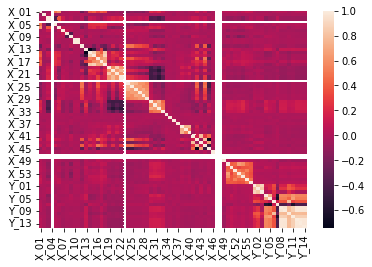

In [15]:
#히트맵 그리기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(train.corr())

In [16]:
# train, test set 합치기
data = pd.concat([train, test], axis =0)

In [17]:
data.isnull().sum()

ID         0
X_01       0
X_02       0
X_03       0
X_04       0
        ... 
Y_10    5945
Y_11    5945
Y_12    5945
Y_13    5945
Y_14    5945
Length: 71, dtype: int64

In [18]:
# 요소 개수
len(data['X_01'].unique())

24

In [19]:
unique_len=data.apply(lambda x : len(x.unique()))

1. 1단위
2. 10단위
3. 100단위
3. 1000단위
4. 10000단위


In [20]:
unique_len

ID      10580
X_01       24
X_02        2
X_03      245
X_04        1
        ...  
Y_10     2340
Y_11     2461
Y_12     2200
Y_13     2241
Y_14     2239
Length: 71, dtype: int64

In [21]:
group_1= unique_len[unique_len <=9].index

In [22]:
group_2= unique_len[(unique_len >9) & (unique_len <=99)].index

In [23]:
group_3= unique_len[(unique_len >99) & (unique_len <=999)].index

In [24]:
group_4=unique_len[(unique_len >999) & (unique_len <=9999)].index

In [25]:
group_5=unique_len[(unique_len >9999) & (unique_len <=99999)].index

In [62]:
data[group_3].head()

,X_03,X_05,X_38,X_39,X_40
0,0,0,-16.41,-16.36,-17.03
1,0,1,-16.06,-16.11,-16.74
2,1,2,-16.16,-16.17,-16.76
3,0,1,-16.05,-16.03,-16.67
4,1,1,-16.25,-16.23,-16.85


In [27]:
# 구간화 하여 성능을 높여보자
data['X_03'].min()

55.57

In [28]:
data['X_03'].max()

85.47

In [29]:
len(data['X_03'].unique())

245

In [30]:
import numpy as np

In [31]:
 counts, bin_dividers = np.histogram(data['X_03'], bins =7)

In [32]:

data['X_03']=pd.factorize(pd.cut(data['X_03'], bins = bin_dividers, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [33]:
#X_38	X_39	X_40

In [34]:
data['X_05']

0       101.892
1       101.944
2       103.153
3       101.971
4       101.981
         ...   
5939    101.922
5940    101.925
5941    102.035
5942    101.868
5943    101.903
Name: X_05, Length: 10580, dtype: float64

In [35]:
counts, bin_dividers2 = np.histogram(data['X_05'], bins =7)

In [36]:

data['X_05']=pd.factorize(pd.cut(data['X_05'], bins = bin_dividers2, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [55]:
def make_bin(array, n):
  array= - array
  _, bin_dividers=np.histogram(array, bins = n)
  cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
  binde_array = pd.factorize(cut_categories)[0]
  return bined_array

In [73]:
pd.Series(make_bin(data['X_38'], 100)).value_counts()


ValueError: ignored

In [74]:
data['X_38'] = make_bin(data['X_38'], 10)
data['X_39'] = make_bin(data['X_39'], 6)
data['X_40'] = make_bin(data['X_40'], 4)

ValueError: ignored

In [69]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

## Data Load

In [75]:
train_df = pd.read_csv('./train.csv')

In [76]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

## Regression Model Fit

In [77]:
LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)
print('Done.')

Done.


## Inference

In [78]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

In [79]:
preds = LR.predict(test_x)
print('Done.')

Done.


## Submit

In [80]:
submit = pd.read_csv('./sample_submission.csv')

In [81]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [82]:
submit.to_csv('./submit.csv', index=False)